In [1]:
 # Load the libraries we need - numpy, pandas, pyplot, and statsmodels.api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load the advertising dataset into a pandas data frame
df = pd.read_csv('~/IMT_574/Week2/Advertising.csv', index_col=0)

For TV:

In [3]:
y = df.Sales
X = df.TV
X = sm.add_constant(X)

In [4]:
lr_model = sm.OLS(y,X).fit()

In [5]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        14:32:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [6]:
print(lr_model.params)

const    7.032594
TV       0.047537
dtype: float64


Text(0, 0.5, 'Sales')

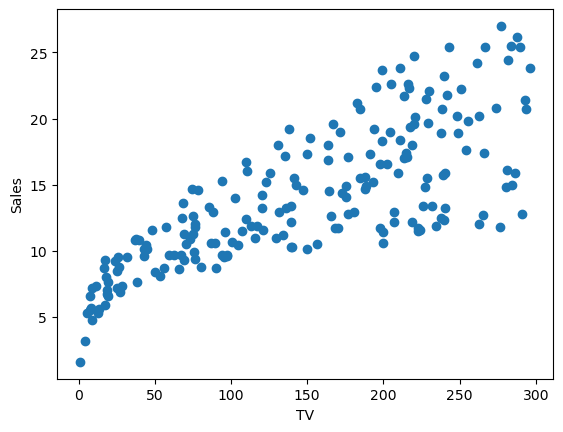

In [7]:
plt.figure()
plt.scatter(df.TV,df.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')

For Radio:

In [8]:
y = df.Sales
X = df.Radio
X = sm.add_constant(X)

In [9]:
lr_model = sm.OLS(y,X).fit()

In [10]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           4.35e-19
Time:                        14:32:27   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

In [11]:
print(lr_model.params)

const    9.311638
Radio    0.202496
dtype: float64


Text(0, 0.5, 'Sales')

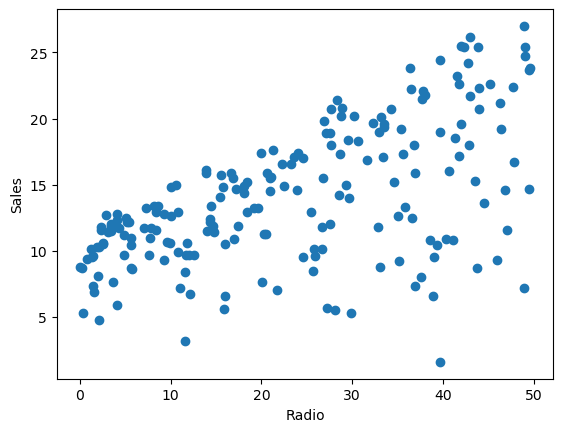

In [12]:
plt.figure()
plt.scatter(df.Radio,df.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')

For TV & Radio:

In [13]:
y = df['Sales']
X = df[['TV','Radio']]
X = sm.add_constant(X)

In [14]:
lr_model = sm.OLS(y,X).fit()

In [15]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           4.83e-98
Time:                        14:32:28   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [16]:
print(lr_model.params)

const    2.921100
TV       0.045755
Radio    0.187994
dtype: float64


3D plot:

/var/folders/cq/0jb064816rn07k67cjcpfx700000gn/T/ipykernel_1946/999138311.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z_axis = lr_model.params[0] + lr_model.params[1] * X_axis + lr_model.params[2] * Y_axis


Text(0.5, 0, 'Sales')

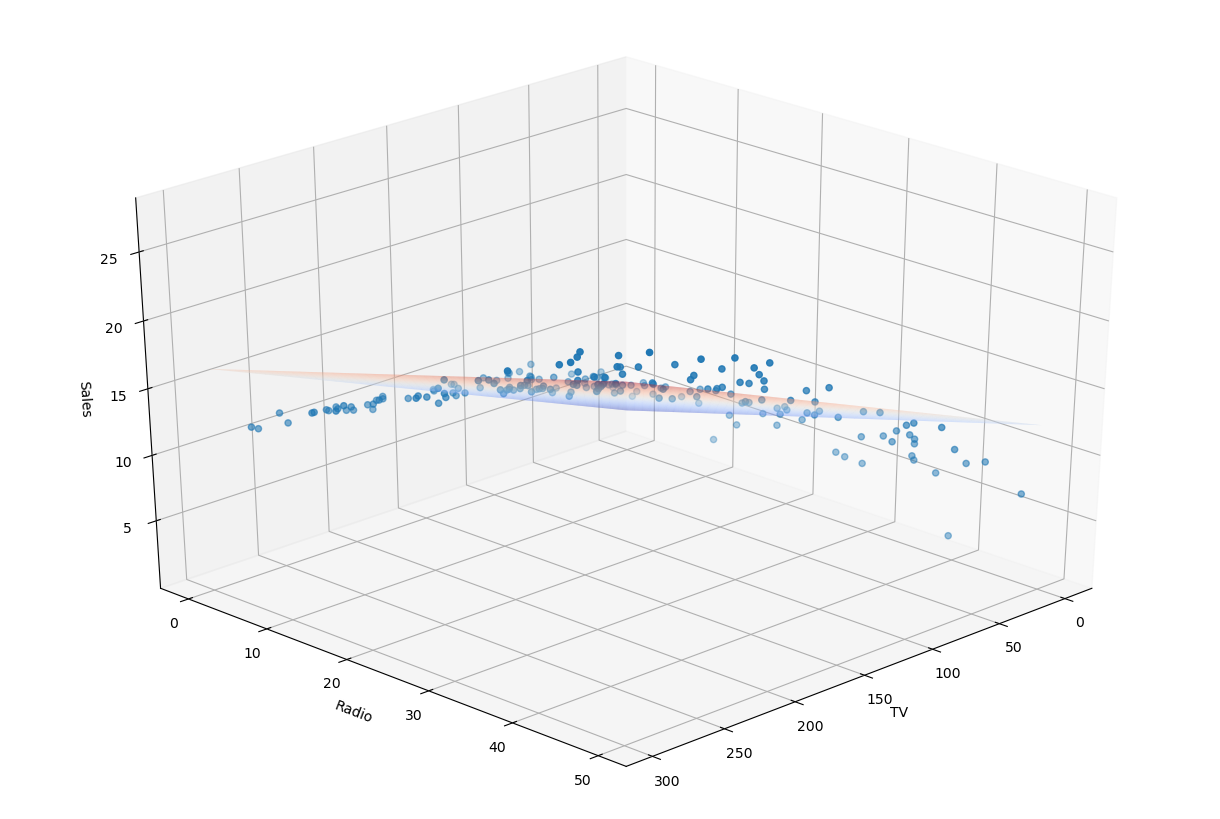

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Figure out X and Y axis using ranges from TV and Radio
X_axis, Y_axis = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100),
np.linspace(X.Radio.min(), X.Radio.max(), 100))
  
# Plot the hyperplane by calculating corresponding Z axis (Sales)
Z_axis = lr_model.params[0] + lr_model.params[1] * X_axis + lr_model.params[2] * Y_axis

# Create matplotlib 3D axes
fig = plt.figure(figsize=(12, 8))# figsize refers to width and height ofthe figure
ax = Axes3D(fig, azim=45)
  
# Plot hyperplane
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap=plt.cm.coolwarm, alpha=0.5,
linewidth=0)
  
# Plot data points
ax.scatter(X.TV, X.Radio, y)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')